<a href="https://colab.research.google.com/github/guilhermelaviola/DataScienceApplicationsInComputerVision/blob/main/Class14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Processing and Optimization Techniques**
Real-time image processing, along with resource optimization, has become increasingly important in applications such as smart surveillance, diagnostic imaging, and autonomous vehicles. The major challenge is to handle large volumes of visual data quickly and efficiently, without compromising processing quality or overloading available computing resources. Optimizing the use of computing resources in image processing involves strategies to make the best use of available hardware, be it CPUs, GPUs, or embedded systems. A common approach is the use of parallelism, where multiple parts of an image can be processed simultaneously, speeding up the overall process. Furthermore, using algorithms that take full advantage of specialized hardware architectures can significantly reduce processing time and memory usage. Another way to optimize resources is to work with lower-resolution images or by using only the most relevant parts of the image, especially in systems that require fast responses. Adaptive processing, which adjusts the level of detail as needed, is another efficient method for dealing with resource constraints without significantly compromising processing accuracy.

In [8]:
# Importing all the necessary libraries:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from google.colab import files
from google.colab.patches import cv2_imshow
import io

In [13]:
# Defining the functions
# Function to load and compress the image:
def compress_image(img):
  img = cv2.resize(img, (256, 256)) # Reducing resolution for processing
  compressed_img_tuple = cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 50])
  # Extract the byte array from the tuple
  img = cv2.imdecode(compressed_img_tuple[1], 1) # Image decompression for further processing
  return img

# Function for noise reduction using bilateral filter:
def denoise_image(image):
  return cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Defining a simple CNN to apply on the processed image:
def create_cnn_model(input_shape):
  model = models.Sequential([
      Input(shape=input_shape),
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers. Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense (10, activation='softmax')
  ])
  return model

In [14]:
# User image upload:
uploaded = files.upload()

Saving craco-italy-01.jpg to craco-italy-01 (2).jpg


In [15]:
# Extracting the name of the uploaded image:
image_path = list(uploaded.keys())[0]

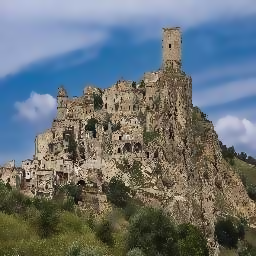

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Prediction: 6


In [16]:
# Uploading, compressing, and reducing image noise:
image_stream = io.BytesIO(uploaded[image_path])
file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
image = cv2.imdecode(file_bytes, 1)

try:
  image = compress_image(image)
  image = denoise_image(image)

  # Preparing the image for processing by CNN:
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting to RGB
  image = np.expand_dims(image, axis=0) # Adding a dimension to batch

  # Criar e compilar o modelo
  model = create_cnn_model((256, 256, 3))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Displaying the processed image:
  cv2_imshow(cv2.cvtColor(image[0], cv2.COLOR_RGB2BGR))

  # Performing inference with the model (no training in this example):
  prediction = model.predict(image)
  print(f'Prediction: {np.argmax(prediction)}')

except ValueError as e:
  print(e)